In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
import sklearn
import csv
import json
import math


In [4]:
d1 = pd.read_csv('input.csv')
d1.head()

,lattitude,longitude,threatLevel
0,25.446850,81.852408,2
1,25.448621,81.855327,1
2,25.447243,81.861937,0
3,25.518251,81.833823,1
4,25.444452,81.850557,2


In [5]:

d1.head()

,lattitude,longitude,threatLevel
0,25.446850,81.852408,2
1,25.448621,81.855327,1
2,25.447243,81.861937,0
3,25.518251,81.833823,1
4,25.444452,81.850557,2


In [0]:
x=d1.to_numpy()

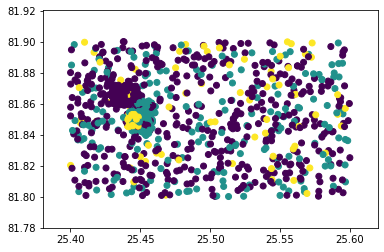

In [7]:
plt.scatter(x[:,0], x[:,1], c = x[:,2])


In [8]:
y = x[:,-1]
print(y.size)
y

1200


array([2., 1., 0., ..., 2., 1., 2.])

In [0]:
x = np.delete(x, -1, axis=1)

In [10]:
x.shape

(1200, 2)

In [11]:
x[:,0]

array([25.44685 , 25.448621, 25.447243, ..., 25.446295, 25.449424,
       25.447302])

In [12]:
x[0]

array([25.44685 , 81.852408])

In [13]:
x[0,0]

25.44685

In [0]:
for i in range(0,1200):
  x[i,0]=(x[i,0]-25.445)*10000000

In [0]:
for i in range(0,1200):
  x[i,0]=(x[i,0]-81.86)

In [16]:
x

array([[18418.14000001,    81.852408  ],
       [36128.13999999,    81.855327  ],
       [22348.14      ,    81.861937  ],
       ...,
       [12868.14000002,    81.851985  ],
       [44158.14      ,    81.848069  ],
       [22938.14      ,    81.849906  ]])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
from sklearn.metrics import accuracy_score

In [18]:
from xgboost import XGBClassifier
model2 = XGBClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test,y_pred2)) #xgb

0.7291666666666666


In [19]:
print(y_test)
print(y_pred2)

[0. 0. 1. 0. 0. 0. 1. 2. 2. 1. 0. 0. 1. 1. 1. 2. 2. 0. 0. 2. 0. 1. 1. 0.
 0. 2. 0. 0. 0. 2. 2. 2. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 2. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 2. 0. 0. 1. 2. 2. 2. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 2. 2. 0. 0.
 0. 2. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 2. 1. 0. 0. 0. 1. 2. 0. 0. 2. 0. 0. 0. 0. 2. 2. 0. 2. 1. 1. 0. 1.
 1. 0. 1. 0. 2. 0. 0. 2. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 2. 1. 0. 1.
 2. 1. 0. 2. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2. 1. 0. 1. 0.
 1. 1. 2. 0. 2. 1. 0. 0. 2. 2. 0. 0. 1. 1. 0. 0. 1. 0. 2. 0. 1. 1. 1. 0.
 2. 2. 2. 0. 1. 0. 2. 0. 0. 2. 0. 1. 0. 2. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.]
[0. 0. 1. 1. 0. 0. 1. 2. 2. 1. 0. 0. 0. 1. 1. 2. 2. 0. 0. 2. 0. 0. 0. 0.
 0. 2. 0. 0. 2. 2. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 2. 2. 2. 2. 0. 0. 1. 1. 0. 0. 0. 1. 0

In [0]:
#svm
x = preprocessing.normalize(x)

In [22]:
#logistic
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.5291666666666667


In [23]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [24]:
joblib.dump(model2, 'model.pkl')
print("Model dumped!")

Model dumped!
